In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

the ΔΗ in J/mol is: -21754
the slope is: 2617
the intercept is: -8.60
the r_adj is: 0.985
the p value is: 0.00028490958607964523
the standard error is 132.683


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

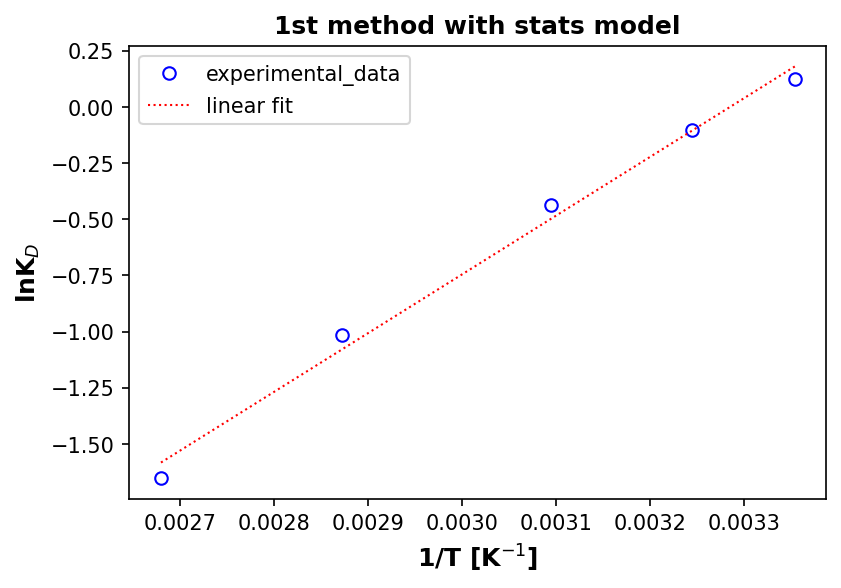

In [2]:
# data to fit
x = np.array([0.003354016, 0.003245173, 0.003094538, 0.002872325, 0.002679887])
y = np.array([0.123558136, -0.103970838, -0.436980329, -1.016436501, -1.653085958])

slope, intercept, r, p, std_err = stats.linregress(x, y)

def linear(x):
    return slope*x + intercept


mymodel = list(map(linear, x))

# calculate r_sq
r_sq = r**2

# calcular r_adj
n = len(y)
r_adj = 1 - (((1-abs(r_sq))*(n-1))/(n-3))

Ea = -slope*8.314
print('the ΔΗ in J/mol is: {0:.0f}'.format(Ea))

plt.figure(figsize=(6, 4), dpi=150) 
plt.plot(x, y, 'bo', mfc = 'none', label = 'experimental_data')
plt.plot(x, mymodel, ":", color = 'r', label = 'linear fit', lw = 1)

# you can format the digits of the floats
print('the slope is: {0:.0f}'.format(slope))
print('the intercept is: {0:.2f}'.format(intercept))
print('the r_adj is: {0:.3f}'.format(r_adj))
print('the p value is: ' + str(p))
print('the standard error is {0:.3f}'.format(std_err))

plt.xlabel('1/T [K$^{-1}$]', fontsize=12, fontweight='bold')
plt.ylabel('lnK$_D$', fontsize=12, fontweight='bold')
plt.title('1st method with stats model', fontsize=12, fontweight='bold', loc = 'center')
plt.legend()
plt.tight_layout

the coefficient of determination is r_sq: 0.9923449989384839
the coefficient of determination r_adj is: 0.9846899978769679
the intercept is: -8.595856308681105
the slope is: [2616.58964091]
the ΔΗ in J/mol is: [-21754.32627456]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

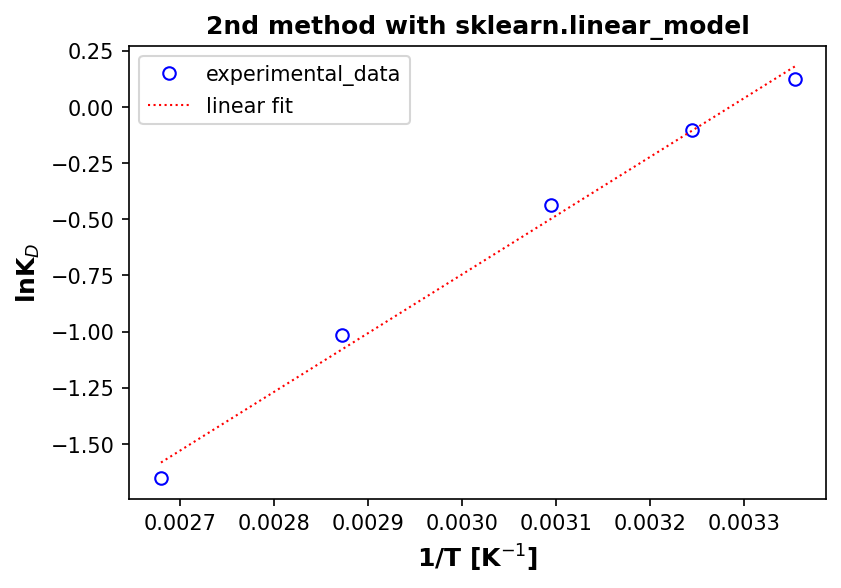

In [3]:
# data to fit
x = np.array([0.003354016, 0.003245173, 0.003094538, 0.002872325, 0.002679887])
y = np.array([0.123558136, -0.103970838, -0.436980329, -1.016436501, -1.653085958])

x = x.reshape((-1, 1))
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

r_sq = model.score(x, y)
print(f'the coefficient of determination is r_sq: {r_sq}')

n = len(y)
r_adj = 1 - (((1-abs(r_sq))*(n-1))/(n-3))
print(f'the coefficient of determination r_adj is: {r_adj}')

intercept = model.intercept_
print(f'the intercept is: {model.intercept_}')

slope = model.coef_
print(f'the slope is: {model.coef_}')

Ea = -slope*8.314
print(f'the ΔΗ in J/mol is: {Ea}')

plt.figure(figsize=(6, 4), dpi=150) 
plt.plot(x, y, 'bo', mfc = 'none', label='experimental_data')
plt.plot(x, y_pred, ":", color = 'r', label = 'linear fit', lw = 1)
plt.xlabel('1/T [K$^{-1}$]', fontsize=12, fontweight='bold')
plt.ylabel('lnK$_D$', fontsize=12, fontweight='bold')
plt.title('2nd method with sklearn.linear_model', fontsize=12, fontweight='bold', loc = 'center')
plt.legend()
plt.tight_layout

the ΔΗ in J/mol: -21754.326274558334
the r_sq is: 0.992 
the coefficient of determination r_adj is: 0.9846899978769681
the root mean squared error is: 0.056 


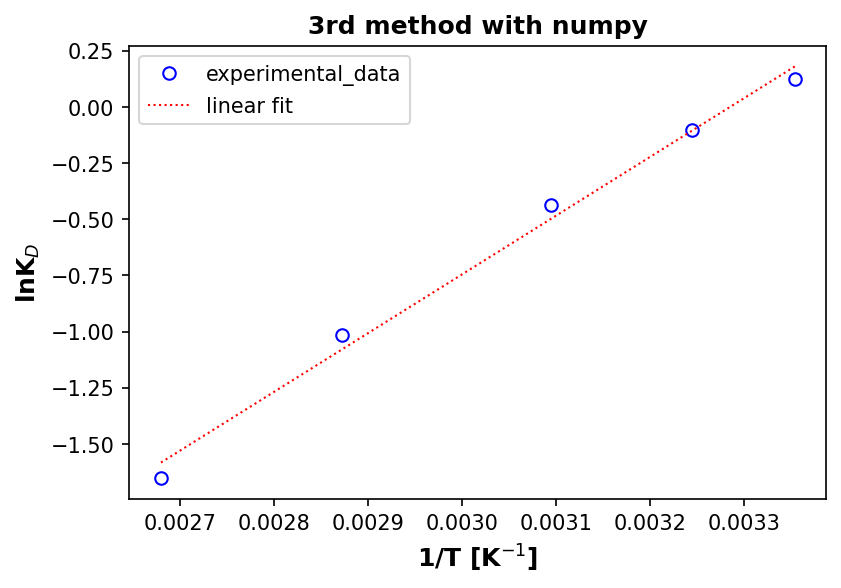

In [4]:
# data to fit
x = np.array([0.003354016, 0.003245173, 0.003094538, 0.002872325, 0.002679887])
y = np.array([0.123558136, -0.103970838, -0.436980329, -1.016436501, -1.653085958])

X = np.vstack([x, np.ones(len(x))]).T
slope, intercept = np.linalg.lstsq(X, y, rcond=None)[0]
yfit = slope*x + intercept

Ea = -slope*8.314
print('the ΔΗ in J/mol:', Ea)

result = np.linalg.lstsq(X, y, rcond=None)

# calculate r_sq
corr_matrix = np.corrcoef(y, yfit)
corr = corr_matrix[0,1]
r_sq = corr**2

print('the r_sq is: %.3f ' %r_sq)

# calculate r_ads
n = len(y)
r_adj = 1 - (((1-abs(r_sq))*(n-1))/(n-3))
print(f'the coefficient of determination r_adj is: {r_adj}')

# Get the total error which is placed in index 1
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X))

# Print
print("the root mean squared error is: %.3f " %rmse)

plt.figure(figsize=(6, 4), dpi=150) 
plt.plot(x, y, 'bo', mfc = 'none', label='experimental_data')
plt.plot(x, yfit, ':', color = 'r', label = 'linear fit', lw = 1)
plt.xlabel('1/T [K$^{-1}$]', fontsize=12, fontweight='bold')
plt.ylabel('lnK$_D$', fontsize=12, fontweight='bold')
plt.title('3rd method with numpy', fontsize=12, fontweight='bold', loc = 'center')
plt.tight_layout
plt.legend()